# Template notebook

It's good to start with an introduction, to set the scene and introduce your audience to the data, and the problem you're solving as a team.

<br>

## Libraries
As always, we'll start by importing the necessary libraries.

In [27]:
# It's good practice to add comments to explain your code 
import numpy as np
import pandas as pd

**Question / Task 1**

Insert context about question / task 1 here.

In [28]:
# Read in data
df = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv", low_memory=False)

df.test_date = pd.to_datetime(df.test_date)

print(df.info())
print(df.isna().sum())
df.head()
#11th March - 23rd April / 24th April - 30th April

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   test_date            278848 non-null  datetime64[ns]
 1   cough                278596 non-null  float64       
 2   fever                278596 non-null  float64       
 3   sore_throat          278847 non-null  float64       
 4   shortness_of_breath  278847 non-null  float64       
 5   head_ache            278847 non-null  float64       
 6   corona_result        278848 non-null  object        
 7   age_60_and_above     151528 non-null  object        
 8   gender               259285 non-null  object        
 9   test_indication      278848 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 21.3+ MB
None
test_date                   0
cough                     252
fever                     252
sore_throat               

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other


In [29]:
# Have a quick look at data
print(df.describe())
print(df.corona_result.value_counts(normalize=True))
print(df.age_60_and_above.value_counts(normalize=True))
print(df.gender.value_counts(normalize=True))
print(df.test_indication.value_counts(normalize=True))

                           test_date          cough          fever  \
count                         278848  278596.000000  278596.000000   
mean   2020-04-10 11:50:32.361716480       0.151574       0.078077   
min              2020-03-11 00:00:00       0.000000       0.000000   
25%              2020-04-01 00:00:00       0.000000       0.000000   
50%              2020-04-12 00:00:00       0.000000       0.000000   
75%              2020-04-21 00:00:00       0.000000       0.000000   
max              2020-04-30 00:00:00       1.000000       1.000000   
std                              NaN       0.358608       0.268294   

         sore_throat  shortness_of_breath      head_ache  
count  278847.000000        278847.000000  278847.000000  
mean        0.006907             0.005655       0.008657  
min         0.000000             0.000000       0.000000  
25%         0.000000             0.000000       0.000000  
50%         0.000000             0.000000       0.000000  
75%         0.0

<Axes: >

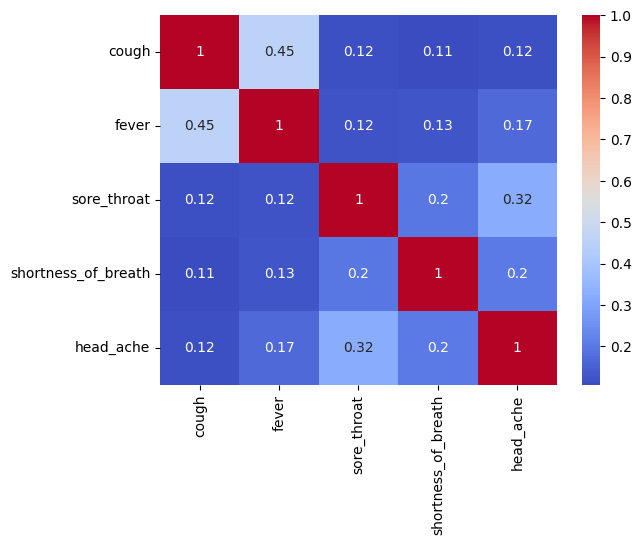

In [30]:
# Do we wnat to do anything different
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()
# Correlation heatmap for numeric features
# plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

<Axes: xlabel='test_date', ylabel='age_60_and_above'>

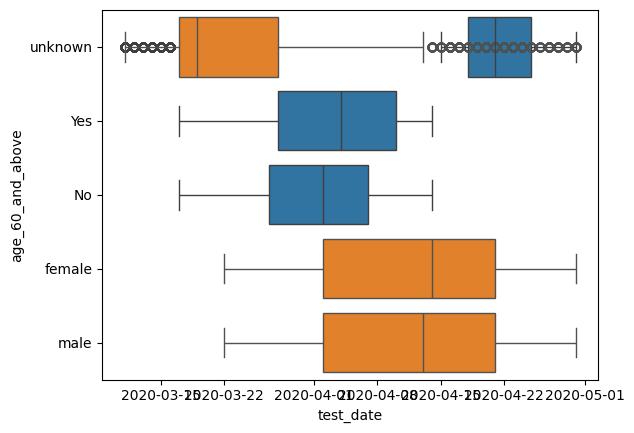

In [31]:
# Test date vs age
df2 = df.copy()

df2['age_60_and_above'] = df2['age_60_and_above'].fillna('unknown')
df2['gender'] = df2['gender'].fillna('unknown')

sns.boxplot(x='test_date', y='age_60_and_above', data=df2)
# plt.title('age by test date')
# plt.show()

# Test date vs gender correlation
sns.boxplot(x='test_date', y='gender', data=df2)
# plt.title('gender vs test date')
# plt.show()

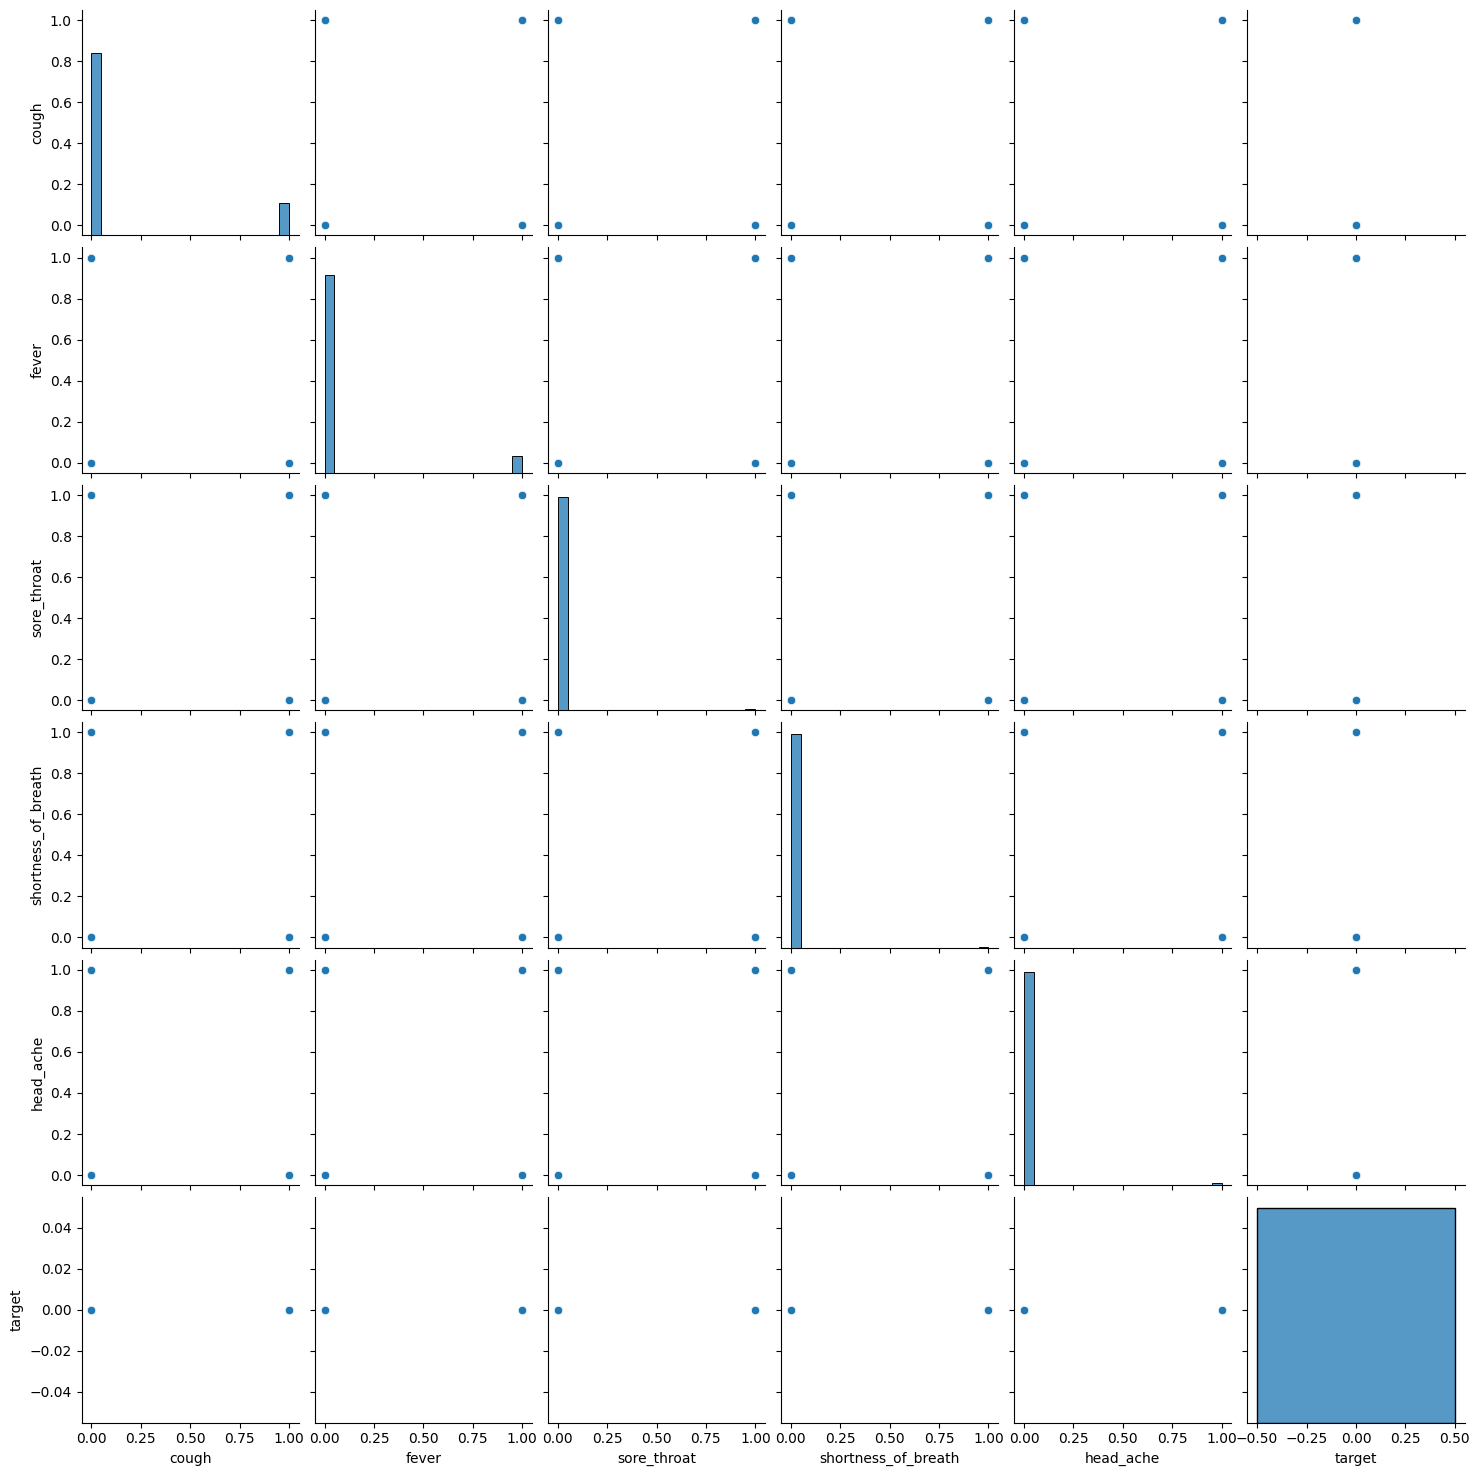

In [32]:
# Pairplots
# df2['target'] = df2.corona_result == "yes"
# sns.pairplot(data=df2)
# plt.title('age by test date')
# plt.show()

# # Test date vs gender correlation
# sns.pairplot(x='corona_result', y='gender', data=df2)
# plt.title('gender vs test date')
# plt.show()

In [34]:
# Real quick dirty cleaning of data
df['target'] = df.corona_result == "positive" # Flag target to predict

# # If cough,fever,sore_throat,shortness_of_breath,head_ache with 0s
# symptoms = ['cough','fever','sore_throat','shortness_of_breath','head_ache']
# df_fill = df.copy()
# df_fill[symptoms]=df_fill[symptoms].fillna(0)
# df_fill.head()

# df_fill.isna().sum()

# # Remove tremaining rows with NAs (gender and age)
# df_fill = df_fill.dropna()
df = df.dropna()

# df_fill.isna().sum()
df.isna().sum()

# # Dummify char vars
# df_fill.age_60_and_above = df_fill.age_60_and_above == "yes"
# df_fill['male'] = df_fill.gender == 'male'
# df_fill['test_indication_contact'] = df_fill.test_indication == 'Contact with confirmed'
# df_fill['test_indication_abroad'] = df_fill.test_indication == 'Abroad'
# df_fill['test_indication_other'] = df_fill.test_indication == 'Other'

# Dummify char vars 
df.age_60_and_above = df.age_60_and_above == "yes"
df['male'] = df.gender == 'male'
df['test_indication_contact'] = df.test_indication == 'Contact with confirmed'
df['test_indication_abroad'] = df.test_indication == 'Abroad'
df['test_indication_other'] = df.test_indication == 'Other'

# Drop corona_result, gender and test_indicator as now dummified
df = df.drop(['corona_result', 'gender', 'test_indication'], axis=1)

df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,target,male,test_indication_contact,test_indication_abroad,test_indication_other
122808,2020-04-14,1.0,0.0,0.0,0.0,0.0,False,False,True,False,False,True
122809,2020-04-14,1.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True
122810,2020-04-14,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,True
122811,2020-04-14,0.0,1.0,0.0,0.0,0.0,False,False,False,False,True,False
122812,2020-04-14,1.0,0.0,0.0,0.0,0.0,False,False,False,False,False,True


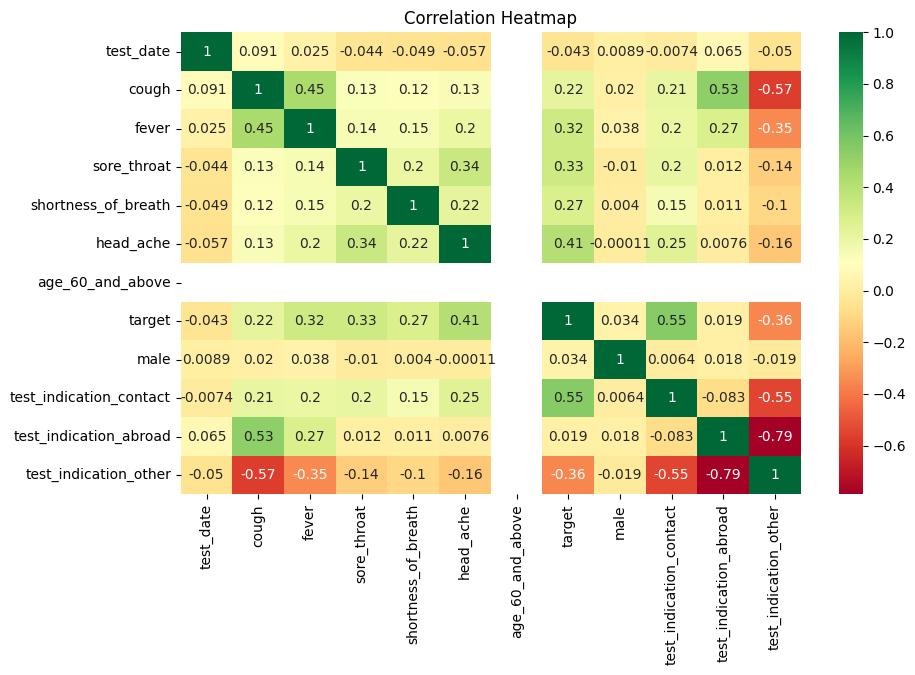

In [152]:
# numeric_df = df.copy()
# numeric_df.corr()
# #df.info()
# # Correlation heatmap for numeric features
# plt.figure(figsize=(10,6))
# sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn')
# plt.title('Correlation Heatmap')
# plt.show()

In [35]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 138172 entries, 122808 to 265120
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   test_date                138172 non-null  datetime64[ns]
 1   cough                    138172 non-null  float64       
 2   fever                    138172 non-null  float64       
 3   sore_throat              138172 non-null  float64       
 4   shortness_of_breath      138172 non-null  float64       
 5   head_ache                138172 non-null  float64       
 6   age_60_and_above         138172 non-null  bool          
 7   target                   138172 non-null  bool          
 8   male                     138172 non-null  bool          
 9   test_indication_contact  138172 non-null  bool          
 10  test_indication_abroad   138172 non-null  bool          
 11  test_indication_other    138172 non-null  bool          
dtypes: bool(6), date

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache
count,138172,138172.000000,138172.000000,138172.000000,138172.000000,138172.000000
mean,2020-04-02 21:08:09.303187200,0.182114,0.093015,0.010827,0.007831,0.015191
min,2020-03-22 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-03-29 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020-04-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020-04-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020-04-14 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.385940,0.290454,0.103489,0.088145,0.122313


In [44]:
# Split the data into train and test splits
from sklearn.model_selection import train_test_split

# train = df[df['test_date'] < '2020-04-08']
# test = df[df['test_date'] >= '2020-04-08']

# X_train = train.drop(['target', 'test_date'], axis=1)
# y_train = train.target
# X_test = test.drop(['target', 'test_date'], axis = 1)
# y_test = test.target

X = df.drop(['target', 'test_date'], axis=1)
y  = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


target
False    0.923098
True     0.076902
Name: proportion, dtype: float64
target
False    0.923092
True     0.076908
Name: proportion, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 96720 entries, 133436 to 126600
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cough                    96720 non-null  float64
 1   fever                    96720 non-null  float64
 2   sore_throat              96720 non-null  float64
 3   shortness_of_breath      96720 non-null  float64
 4   head_ache                96720 non-null  float64
 5   age_60_and_above         96720 non-null  bool   
 6   male                     96720 non-null  bool   
 7   test_indication_contact  96720 non-null  bool   
 8   test_indication_abroad   96720 non-null  bool   
 9   test_indication_other    96720 non-null  bool   
dtypes: bool(5), float64(5)
memory usage: 4.9 MB


In [41]:
# Import model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X_train.isna().sum()
# Initialize and train the model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

# # Make predictions and evaluate
y_pred = gbc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9576377496863843


0.9117119711278784


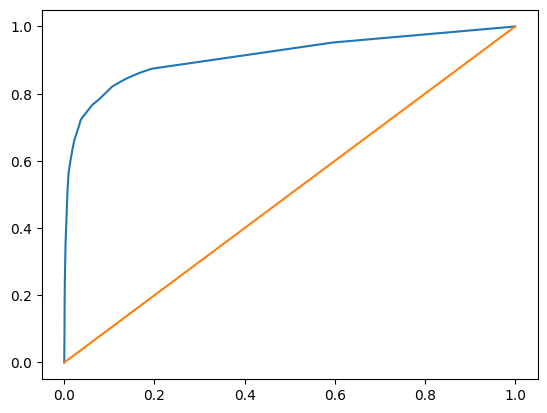

In [42]:
import matplotlib.pyplot as plt

#Use ROC curve to find the right threshold value
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


y_proba = gbc.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
print(roc_auc_score(y_test, y_proba[:,1]))

fig_roc, ax_roc = plt.subplots()
ROC = roc_curve(y_test, y_proba[:,1])
ax_roc.plot(ROC[0], ROC[1])
ax_roc.plot([0, 1], [0, 1])

# #We have a ROCAUC score of 0.844 which indicates the model is better than random at guessing, closer to 1 is better
# #Try plotting precision versus recall for different thresholds

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Precision - of all the people you predicted as true, how many were actually true
# Recal - of all the people who were true, how many did you preidct as true

              precision    recall  f1-score   support

       False       0.96      0.99      0.98     38264
        True       0.83      0.56      0.67      3188

    accuracy                           0.96     41452
   macro avg       0.90      0.78      0.82     41452
weighted avg       0.95      0.96      0.95     41452



In [50]:
# Let's try some hyperparamenter tuning
from sklearn.model_selection import GridSearchCV

# n_estimators - num of trees, default = 100. More estimators can imporve performance but also overfit
# learning_rate - controls contribution of each tree to final model. Smaller gives more robust model, but needs more estimators, default = 0.1
# max_depth - of ind tree, shallow trees might underfit, deep overfit, default = None

# min_samples_split - min num of samples required to split a node, default = 2. Increase to help overfitting
# subsample - fraction of sample to use when fitting each tree, default = 1 (i.e. all). Decrease to help overfitting (intro's randomness)
# colsample_bytree - fraction of features to be randomly sampled to build each tree, default = 1 (i.e. all). As above
# min_samples_leaf - min samples at aleaf node, default = 1. Incraese to help with overfitting
# max features - to consider when looking for best split, default = None (i.e all)

param_grid = {
    'n_estimators':[50, 100, 200],
    'learning_rate':[0.01, 0.1, 0.2],
    'max_depth':[3,5,7]
}

mod = GradientBoostingClassifier()

# scoring = accuracy, f1, f1_macro, roc_auc, recall
gscv = GridSearchCV(estimator=mod, param_grid=param_grid, cv=5, scoring='recall_macro', n_jobs=-1)

# Fit the model
gscv.fit(X_train, y_train)

# Output the best params and model
best_model =  gscv.best_estimator_
best_params = gscv.best_params_

y_best_preds = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_best_preds)

# Print some details
print("Best params are ", best_params)
print("Model accuracy is  ", best_accuracy)

Best params are  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Model accuracy is   0.9576377496863843


Best params are  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Model accuracy is   0.9576377496863843
              precision    recall  f1-score   support

       False       0.96      0.99      0.98     38264
        True       0.83      0.56      0.67      3188

    accuracy                           0.96     41452
   macro avg       0.90      0.78      0.82     41452
weighted avg       0.95      0.96      0.95     41452

0.9114291919231932


array([0.03091515, 0.07837226, 0.06729847, 0.0548044 , 0.15715328,
       0.        , 0.00439337, 0.57787893, 0.01802853, 0.01115561])

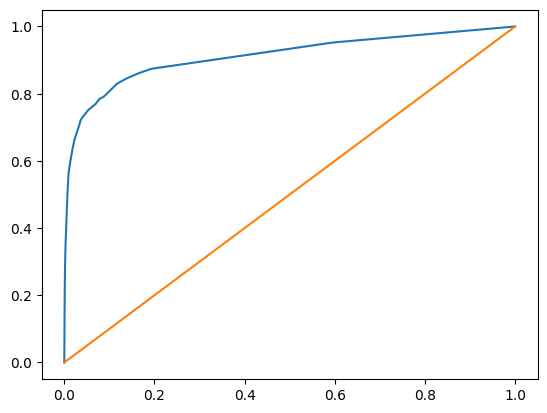

In [52]:

# Print some details
print("Best params are ", best_params)
print("Model accuracy is  ", best_accuracy)

print(classification_report(y_test, y_best_preds))

# And get AUC ROC score
y_best_proba = best_model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_best_proba[:,1])
print(roc_auc_score(y_test, y_best_proba[:,1]))

fig_roc, ax_roc = plt.subplots()
ROC = roc_curve(y_test, y_best_proba[:,1])
ax_roc.plot(ROC[0], ROC[1])
ax_roc.plot([0, 1], [0, 1])

# Get feature importances
best_model.feature_importances_
